<a href="https://colab.research.google.com/github/berbonilla/CCMACLRL_EXERCISES_COM221ML/blob/main/Excercise7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [183]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import nltk
import seaborn as sns
import re
import os, types
import advertools as adv
adv.stopwords.keys()
adv.stopwords['tagalog']

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, precision_score, recall_score, accuracy_score, balanced_accuracy_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

nltk.download("punkt")
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [184]:
splits = {'train': 'unique_train_dataset.csv', 'validation': 'unique_validation_dataset.csv', 'test': 'unique_test_dataset.csv'}

In [185]:
df_train = pd.read_csv("hf://datasets/mapsoriano/2016_2022_hate_speech_filipino/" + splits["train"])

In [186]:
df_validation = pd.read_csv("hf://datasets/mapsoriano/2016_2022_hate_speech_filipino/" + splits["validation"])

In [187]:
df_test = pd.read_csv("hf://datasets/mapsoriano/2016_2022_hate_speech_filipino/" + splits["test"])

In [188]:
document1 = splits

In [189]:
count_vectorizer = CountVectorizer()
count_vectorizer.fit(document1)
count_array = count_vectorizer.transform(document1).toarray()
count_array

array([[0, 1, 0],
       [0, 0, 1],
       [1, 0, 0]])

In [190]:
df = pd.DataFrame(count_array, columns=count_vectorizer.get_feature_names_out())
df

,test,train,validation
0,0,1,0
1,0,0,1
2,1,0,0


In [191]:
data1 = df_train
data1

# converting to lowercase
data1["text"] = data1["text"].str.lower()

# Removing stopwords from the data
stop_words = adv.stopwords['tagalog']
data1["text"] = data1["text"].apply(lambda x: " ".join(word for word in x.split() if word not in stop_words))

# applying lemmatization
wnl = WordNetLemmatizer()
data1["text"] = data1["text"].apply(lambda x: " ".join(wnl.lemmatize(word, "v") for word in x.split()))

data1


,text,label
0,presidential candidate mar roxas imply that th...,1
1,parang mali sumunod patalastas nescaf coffee b...,1
2,bet ko. pula kulay posas,1
3,[username] kakampink,0
4,parang tahimik pink about doc willie ong? no r...,1
...,...,...
21768,marcos talunan marcos magnanakaw,1
21769,grabe kayo kay binay ??????????,0
21770,[username] cnu ba naman hindimabibighani maam!...,0
21771,rt [username]: tabi tabi yung nagsasabing para...,1


In [192]:
#check for duplicate data
df_train['duplicates'] = np.where(df_train['text'].duplicated(keep=False), 1, 0)
print('Top 5 common duplicate texts are:')

Top 5 common duplicate texts are:


In [193]:
#recoding dataset
df_train['target'] = np.where(df_train['label']=='0',0, 1)

In [194]:
count_vectorizer.fit(data1["text"])
count_array = count_vectorizer.transform(data1["text"]).toarray()

df1 = pd.DataFrame(count_array, columns=count_vectorizer.get_feature_names_out())
df1

,00,000,000php,002,004,008,00pm,00something,01,012,...,zubiaga,zubiagapartylist,zubiri,zubiripinag,zulueta,zumba,zuriaga,zyx,zzaj,zzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21768,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21769,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21770,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21771,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [195]:
filo_trashtalk = df_train
filo_trashtalk.head()

,text,label,duplicates,target
0,presidential candidate mar roxas imply that th...,1,0,1
1,parang mali sumunod patalastas nescaf coffee b...,1,0,1
2,bet ko. pula kulay posas,1,0,1
3,[username] kakampink,0,1,1
4,parang tahimik pink about doc willie ong? no r...,1,0,1


In [196]:
filo_trashtalk = filo_trashtalk[0:1000]

In [197]:
# dropping NaN values
filo_trashtalk.isnull().any().sum()

0

In [198]:
filo_trashtalk.dropna(axis = 0, inplace = True)

<ipython-input-198-fc6a74381bee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filo_trashtalk.dropna(axis = 0, inplace = True)


In [199]:
filo_trashtalk.isnull().any().sum()

0

In [200]:
# converting text to lowercase
filo_trashtalk["text"] = filo_trashtalk["text"].str.lower()

# Removing stopwords from the data
stop_words = stopwords.words("english")
filo_trashtalk["text"] = filo_trashtalk["text"].apply(lambda x: " ".join(word for word in x.split() if word not in stop_words))

# removing links
filo_trashtalk["text"] = filo_trashtalk["text"].apply(lambda x: re.sub(r"http\S+|www\.\S+", "", x))

# removing email addresses
filo_trashtalk["text"] = filo_trashtalk["text"].apply(lambda x: re.sub(r"\w+@\w+\.com", "", x))

# removing punctuation marks
filo_trashtalk["text"] = filo_trashtalk["text"].apply(lambda x: re.sub(r"[.,;:!\?\"'`]", "", x))

# removing special characters
filo_trashtalk["text"] = filo_trashtalk["text"].apply(lambda x: re.sub(r"[@#$%^&*\/\+-_=\{\}<>]", "", x))

# removing unnecessary characters
filo_trashtalk["text"] = filo_trashtalk["text"].apply(lambda x: re.sub(r"½m|½s|½t|½ï", "", x))

filo_trashtalk.head()

<ipython-input-200-8261b9b23b97>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filo_trashtalk["text"] = filo_trashtalk["text"].str.lower()
<ipython-input-200-8261b9b23b97>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filo_trashtalk["text"] = filo_trashtalk["text"].apply(lambda x: " ".join(word for word in x.split() if word not in stop_words))
<ipython-input-200-8261b9b23b97>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

,text,label,duplicates,target
0,presidential candidate mar roxas imply govt li...,1,0,1
1,parang mali sumunod patalastas nescaf coffee b...,1,0,1
2,bet ko pula kulay posas,1,0,1
3,username kakampink,0,1,1
4,parang tahimik pink doc willie ong reaction paper,1,0,1


In [201]:
filo_trashtalk["text"] = filo_trashtalk["text"].apply(lambda x: " ".join(wnl.lemmatize(word, "v") for word in x.split()))

filo_trashtalk["text"].head()

<ipython-input-201-abb1884f6f56>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filo_trashtalk["text"] = filo_trashtalk["text"].apply(lambda x: " ".join(wnl.lemmatize(word, "v") for word in x.split()))


,text
0,presidential candidate mar roxas imply govt li...
1,parang mali sumunod patalastas nescaf coffee b...
2,bet ko pula kulay posas
3,username kakampink
4,parang tahimik pink doc willie ong reaction paper


In [202]:
filo_trashtalk['text'].value_counts()

,count
text,
marcos magnanakaw,2
let leni lead leni kiko,2
bbm sara,2
si leni,2
leni kiko,2
...,...
pamabansang pabebeduterte sorry sirbut vote miriam couldve yours,1
username dayaang nagaganap eh bat mas maputi si binay kay roxas wtf hahhahaha,1
username mostly bbm know vote magpapatayo lang daw dadami rebulto aquino pag si leni nanalophvote halalan,1


<ipython-input-203-41f4b1a0608d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = filo_trashtalk['text'], palette = 'rocket')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a le

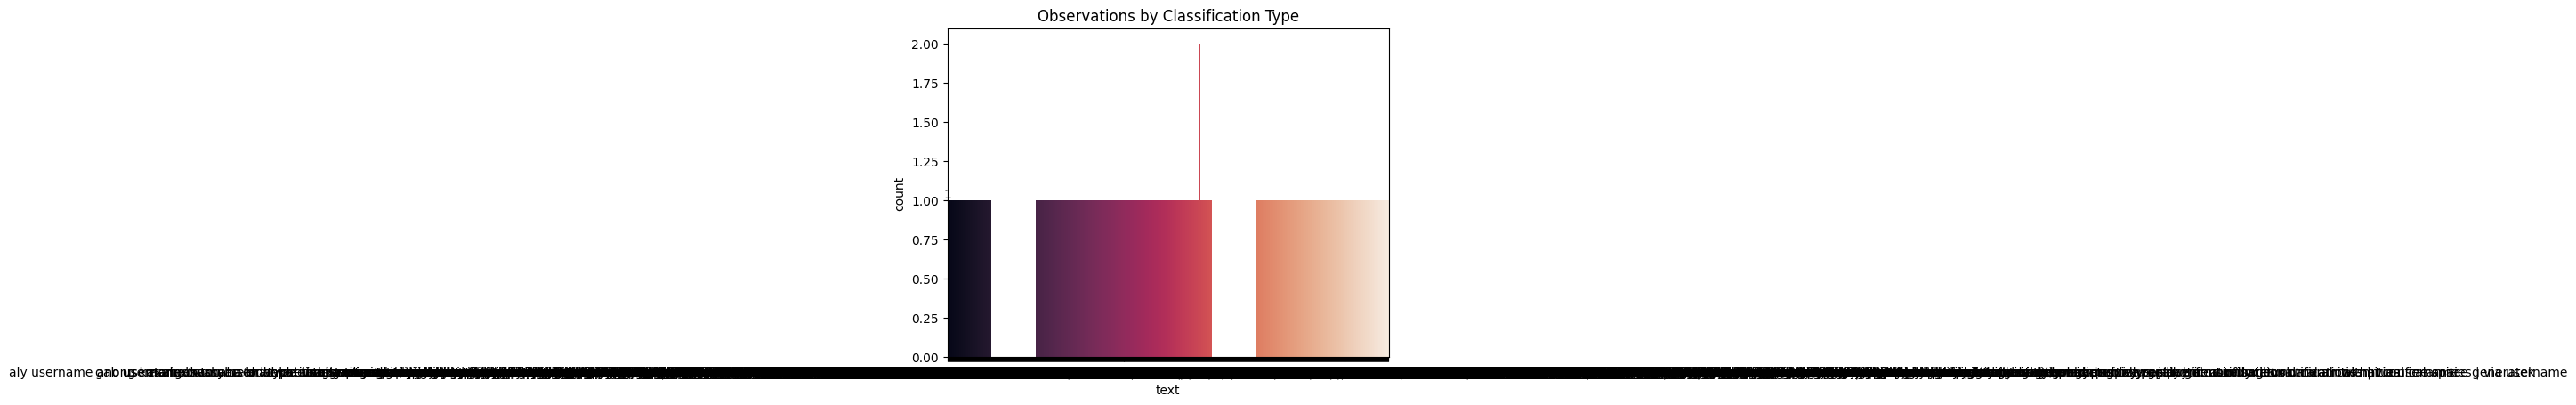

In [203]:
# Explore distribution of dataset

# count plot on single categorical variable
ax = sns.countplot(x = filo_trashtalk['text'], palette = 'rocket')

#add data labels
ax.bar_label(ax.containers[0])

# add plot title
plt.title("Observations by Classification Type")

# show plot
plt.show()

In [204]:
# Dropping all duplicate texts based off of results of EDA
df_no_dup = filo_trashtalk.drop_duplicates(subset=['text'], keep='first')

<ipython-input-205-c671ed7e85e9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = df_no_dup['text'], palette = 'rocket')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-

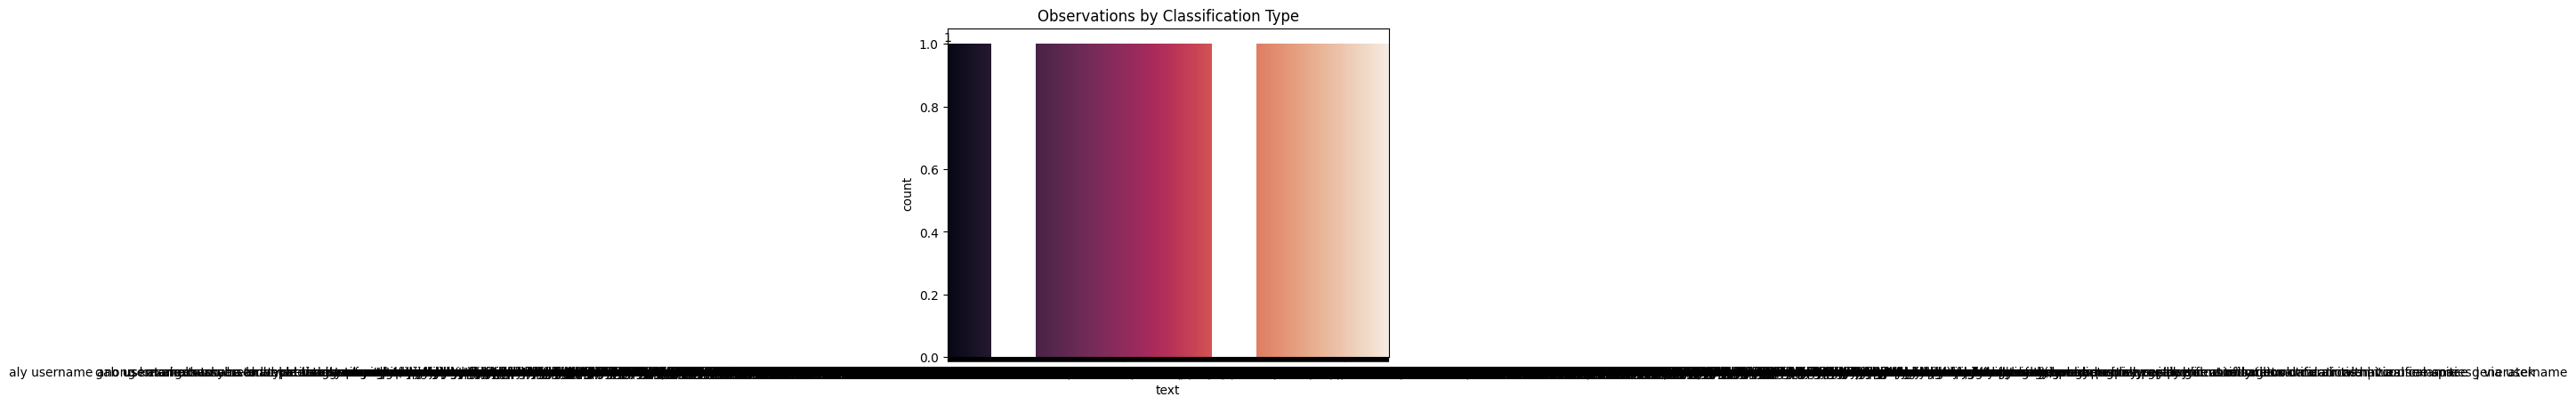

In [205]:
# Explore distribution of dataset

# count plot on single categorical variable
ax = sns.countplot(x = df_no_dup['text'], palette = 'rocket')

#add data labels
ax.bar_label(ax.containers[0])

# add plot title
plt.title("Observations by Classification Type")

# show plot
plt.show()

In [206]:
df_train

,text,label,duplicates,target
0,presidential candidate mar roxas imply that th...,1,0,1
1,parang mali sumunod patalastas nescaf coffee b...,1,0,1
2,bet ko. pula kulay posas,1,0,1
3,[username] kakampink,0,1,1
4,parang tahimik pink about doc willie ong? no r...,1,0,1
...,...,...,...,...
21768,marcos talunan marcos magnanakaw,1,0,1
21769,grabe kayo kay binay ??????????,0,0,1
21770,[username] cnu ba naman hindimabibighani maam!...,0,0,1
21771,rt [username]: tabi tabi yung nagsasabing para...,1,0,1


In [207]:
#let's seperate the output and documents
X = df_train["text"].values
y = df_train["label"].values

In [208]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [209]:
def text_clean(text, method, rm_stop):
    text = re.sub(r"\n","",text)   #remove line breaks
    text = text.lower() #convert to lowercase
    text = re.sub(r"\d+","",text)   #remove digits and currencies
    text = re.sub(r'[\$\d+\d+\$]', "", text)
    text = re.sub(r'\d+[\.\/-]\d+[\.\/-]\d+', '', text)   #remove dates
    text = re.sub(r'\d+[\.\/-]\d+[\.\/-]\d+', '', text)
    text = re.sub(r'\d+[\.\/-]\d+[\.\/-]\d+', '', text)
    text = re.sub(r'[^\x00-\x7f]',r' ',text)   #remove non-ascii
    text = re.sub(r'[^\w\s]','',text)   #remove punctuation
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text)   #remove hyperlinks

    #remove stop words
    if rm_stop == True:
        filtered_tokens = [word for word in word_tokenize(text) if not word in set(stopwords.words('english'))]
        text = " ".join(filtered_tokens)

    #lemmatization: typically preferred over stemming
    if method == 'L':
        lemmer = WordNetLemmatizer()
        lemm_tokens = [lemmer.lemmatize(word) for word in word_tokenize(text)]
        return " ".join(lemm_tokens)

    #stemming
    if method == 'S':
        porter = PorterStemmer()
        stem_tokens = [porter.stem(word) for word in word_tokenize(text)]
        return " ".join(stem_tokens)

    return text

In [210]:
#preprocessed data: Lemm + stopword removal
preprocessed_text_1 = [text_clean(text, 'L', True) for text in X_train]

#preprocessed data: Lemm + no stopword removal
preprocessed_text_2 = [text_clean(text, 'L', False) for text in X_train]

In [211]:
#preprocessed data: Stem + stopword removal
preprocessed_text_3 = [text_clean(text, 'S', True) for text in X_train]

#preprocessed data: Stem + no stopword removal
preprocessed_text_4 = [text_clean(text, 'S', False) for text in X_train]

In [182]:
def transform_model_data_w_count_vectorizer(preprocessed_text, Y_train,  X_test, Y_test):
    #vectorize dataset
    vectorizer = CountVectorizer()
    vectorized_data = vectorizer.fit_transform(preprocessed_text)

    #define model
    model = MultinomialNB(alpha=0.1)
    model.fit(vectorized_data, Y_train)

    #evaluate model
    predictions = model.predict(vectorizer.transform(X_test))
    accuracy = accuracy_score( Y_test, predictions)
    balanced_accuracy = balanced_accuracy_score(Y_test, predictions)
    precision = precision_score(Y_test, predictions)

    print("Accuracy:",round(100*accuracy,2),'%')
    print("Balanced accuracy:",round(100*balanced_accuracy,2),'%')
    print("Precision:", round(100*precision,2),'%')
    return predictions, model

def transform_model_data_w_tfidf_vectorizer(preprocessed_text, Y_train,  X_test, Y_test):
    #vectorize dataset
    tfidf = TfidfVectorizer()
    vectorized_data = tfidf.fit_transform(preprocessed_text)

    #define model
    model = MultinomialNB(alpha=0.1)
    model.fit(vectorized_data, Y_train)

    #evaluate model
    predictions = model.predict(tfidf.transform(X_test))

    accuracy = accuracy_score( Y_test, predictions)
    balanced_accuracy = balanced_accuracy_score(Y_test, predictions)
    precision = precision_score(Y_test, predictions)

    print("Accuracy:",round(100*accuracy,2),'%')
    print("Balanced accuracy:",round(100*balanced_accuracy,2),'%')
    print("Precision:", round(100*precision,2),'%')
    return predictions, model
#vectorize, model, and evaluate model using CountVectorizer

#Lemm + stopword removal
print("Lemm + stopword removal + CountVectorizer")
transform_model_data_w_count_vectorizer(preprocessed_text_1, Y_train,  X_test, Y_test)

#Lemm + no stopword removal
print("\nLemm + no stopword removal + CountVectorizer")
transform_model_data_w_count_vectorizer(preprocessed_text_2, Y_train,  X_test, Y_test)

#Stem + stopword removal
print("\nStem + stopword removal + CountVectorizer")
transform_model_data_w_count_vectorizer(preprocessed_text_3, Y_train,  X_test, Y_test)

#Stem + no stopword removal
print("\nStem + no stopword removal + CountVectorizer")
transform_model_data_w_count_vectorizer(preprocessed_text_4, Y_train,  X_test, Y_test)

Lemm + stopword removal + CountVectorizer
Accuracy: 81.9 %
Balanced accuracy: 81.96 %
Precision: 78.64 %

Lemm + no stopword removal + CountVectorizer
Accuracy: 81.98 %
Balanced accuracy: 82.03 %
Precision: 79.04 %

Stem + stopword removal + CountVectorizer
Accuracy: 80.1 %
Balanced accuracy: 80.16 %
Precision: 76.7 %

Stem + no stopword removal + CountVectorizer
Accuracy: 80.94 %
Balanced accuracy: 81.0 %
Precision: 77.56 %


(array([0, 1, 1, ..., 0, 0, 1]), MultinomialNB(alpha=0.1))

In [212]:
#vectorize, model, and evaluate model using TfidfVectorizer

#Lemm + stopword removal
print("Lemm + stopword removal + TfidfVectorizer")
transform_model_data_w_tfidf_vectorizer(preprocessed_text_1, Y_train,  X_test, Y_test)

#Lemm + no stopword removal
print("\nLemm + no stopword removal + TfidfVectorizer")
transform_model_data_w_tfidf_vectorizer(preprocessed_text_2, Y_train,  X_test, Y_test)

#Stem + stopword removal
print("\nStem + stopword removal + TfidfVectorizer")
transform_model_data_w_tfidf_vectorizer(preprocessed_text_3, Y_train,  X_test, Y_test)

#Stem + no stopword removal
print("\nStem + no stopword removal + TfidfVectorizer")

Lemm + stopword removal + TfidfVectorizer
Accuracy: 82.01 %
Balanced accuracy: 82.06 %
Precision: 79.35 %

Lemm + no stopword removal + TfidfVectorizer
Accuracy: 82.32 %
Balanced accuracy: 82.35 %
Precision: 80.12 %

Stem + stopword removal + TfidfVectorizer
Accuracy: 79.99 %
Balanced accuracy: 80.05 %
Precision: 76.84 %

Stem + no stopword removal + TfidfVectorizer


In [213]:
predictions, model = transform_model_data_w_tfidf_vectorizer(preprocessed_text_4, Y_train,  X_test, Y_test)

Accuracy: 80.88 %
Balanced accuracy: 80.94 %
Precision: 77.54 %


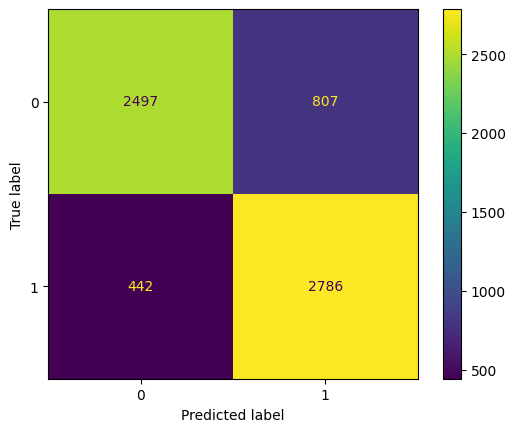

In [214]:
# compute the confusion matrix.
cm = confusion_matrix(Y_test, predictions)

 #Plot the confusion matrix.
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()